In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('customer_acquisition_data.csv')
df.head()

,customer_id,channel,cost,conversion_rate,revenue
0,1,referral,8.320327,0.123145,4199
1,2,paid advertising,30.450327,0.016341,3410
2,3,email marketing,5.246263,0.043822,3164
3,4,social media,9.546326,0.167592,1520
4,5,referral,8.320327,0.123145,2419


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      800 non-null    int64  
 1   channel          800 non-null    object 
 2   cost             800 non-null    float64
 3   conversion_rate  800 non-null    float64
 4   revenue          800 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 31.4+ KB


In [4]:
df.isna().sum()

customer_id        0
channel            0
cost               0
conversion_rate    0
revenue            0
dtype: int64

In [9]:
df[['cost', 'conversion_rate', 'revenue']].describe()

,cost,conversion_rate,revenue
count,800.000000,800.000000,800.000000
mean,13.148052,0.086305,2769.151250
std,9.922337,0.059611,1259.543706
min,5.246263,0.016341,500.000000
25%,5.246263,0.043822,1694.000000
50%,8.320327,0.043822,2764.000000
75%,9.546326,0.123145,3824.250000
max,30.450327,0.167592,4998.000000


In [10]:
# Mapear os valores para categorias mais amplas
mapeamento_canais = {
    'referral': 'Referral',
    'paid advertising': 'Paid Advertising',
    'email marketing': 'Email Marketing',
    'social media': 'Social Media',
}

# Aplicar o mapeamento na coluna 'channel' 
df['channel'] = df['channel'].replace(mapeamento_canais)

# Agregar os dados pelo canal, calculando a soma do custo, média da taxa de conversão e soma da receita
agregado_por_canal = df.groupby('channel').agg({
    'cost': 'sum',
    'conversion_rate': 'mean',
    'revenue': 'sum'
}).reset_index()

# Exibir os dados agregados por canal
print(agregado_por_canal)

            channel         cost  conversion_rate  revenue
0   Email Marketing  1122.700340         0.043822   604706
1  Paid Advertising  5907.363479         0.016341   548396
2          Referral  1722.307634         0.123145   569552
3      Social Media  1766.070249         0.167592   492667


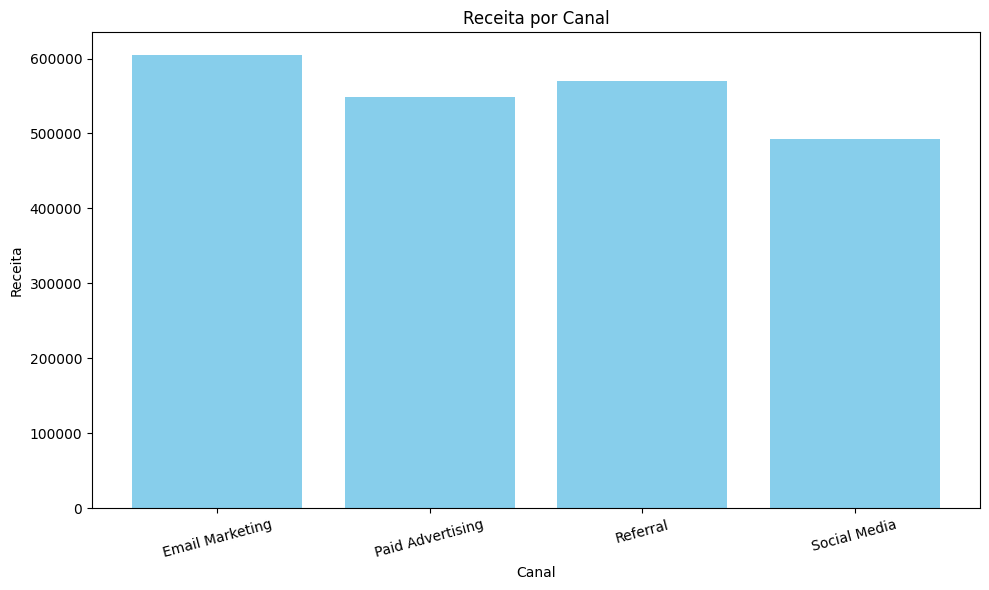

In [11]:
# Exibindo em gráfico
plt.figure(figsize=(10, 6))
plt.bar(agregado_por_canal['channel'], agregado_por_canal['revenue'], color='skyblue')
plt.xlabel('Canal')
plt.ylabel('Receita')
plt.title('Receita por Canal')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show();

Analizando o Lifetime Value

In [12]:
# Calcular o LTV por canal
df['lifetime_value'] = df['revenue'] / df['conversion_rate']

# Calcular o LTV médio por canal
ltv_por_canal = df.groupby('channel')['lifetime_value'].mean().reset_index()

# Identificar os canais mais rentáveis para o negócio (com base no LTV médio)
canal_mais_rentavel = ltv_por_canal.sort_values(by='lifetime_value', ascending=False)

# Exibir o LTV médio por canal
print(f'LTV médio por canal: {ltv_por_canal}')

LTV médio por canal:             channel  lifetime_value
0   Email Marketing    64481.635521
1  Paid Advertising   172981.976170
2          Referral    22343.249119
3      Social Media    15890.143529
